In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
import warnings

In [2]:
train=pd.read_csv(r'F:\Projects\Twitter\twitter_train.csv')
test=pd.read_csv(r'F:\Projects\Twitter\twitter_test.csv')

# Data Inspection

In [3]:
train[train['label']==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train[train['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [5]:
train.shape

(31962, 3)

In [6]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

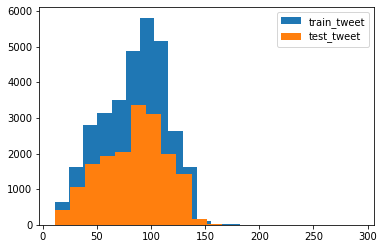

In [7]:
lenght_train=train.tweet.str.len()
lenght_test=test.tweet.str.len()
plt.hist(lenght_train,bins=20,label='train_tweet')
plt.hist(lenght_test,bins=20,label='test_tweet')
plt.legend()
plt.show()

# Data Cleaning 

In [8]:
combined=train.append(test,ignore_index=True)

F:\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [9]:
combined.shape

(49159, 3)

In [10]:
combined.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [11]:
#function to find certain pattern which is not of much used
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    for i in r:
        input_text=re.sub(i,'',input_text)
    return input_text

In [12]:
#Removing twitter Handles
combined['tidy_tweet']=np.vectorize(remove_pattern)(combined.tweet,'@[\w]')

#Removing Special Characters except characters and '#'
combined.tidy_tweet=combined.tidy_tweet.str.replace('[^a-zA-Z#]',' ')


#Removing Short Words
combined.tidy_tweet=combined.tidy_tweet.apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [13]:
#Text Normalization
tokenized_tweet=combined.tidy_tweet.apply(lambda x : x.split())
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combined['tidy_tweet'] = tokenized_tweet
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# WordCloud

In [14]:
all_words = ' '.join([text for text in combined['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [14]:
from collections import Counter
all_words1=Counter()
for i in range(len(combined.tidy_tweet)):
    for words in combined.tidy_tweet[i].split():
        all_words1[words]+=1
all_words1.most_common()    

[('thi', 4127),
 ('with', 3863),
 ('that', 3233),
 ('have', 2805),
 ('your', 2712),
 ('happi', 2700),
 ('#love', 2485),
 ('love', 2427),
 ('just', 2099),
 ('will', 1972),
 ('when', 1892),
 ('time', 1882),
 ('what', 1856),
 ('from', 1642),
 ('thank', 1594),
 ('like', 1589),
 ('today', 1581),
 ('make', 1528),
 ('#posit', 1391),
 ('about', 1333),
 ('they', 1325),
 ('peopl', 1258),
 ('good', 1239),
 ('want', 1197),
 ('more', 1135),
 ('father', 1134),
 ('take', 1127),
 ('life', 1126),
 ('look', 1102),
 ('feel', 1075),
 ('need', 994),
 ('#smile', 973),
 ('wait', 955),
 ('come', 943),
 ('work', 941),
 ('bihday', 927),
 ('#healthi', 900),
 ('there', 877),
 ('week', 876),
 ('year', 840),
 ('#thank', 809),
 ('here', 785),
 ('know', 779),
 ('bull', 777),
 ('onli', 774),
 ('live', 770),
 ('great', 764),
 ('day', 761),
 ('go', 745),
 ('first', 733),
 ('think', 731),
 ('best', 724),
 ('their', 722),
 ('realli', 712),
 ('thing', 702),
 ('watch', 689),
 ('back', 688),
 ('#fun', 677),
 ('been', 670),
 

In [15]:
#Words in Non Racist/Sexist
normal_words=Counter()
for i in range(len(combined.tidy_tweet[combined.label==0])):
    for words in combined.tidy_tweet[i].split():
        normal_words[words]+=1
normal_words.most_common()  

[('thi', 2466),
 ('with', 2341),
 ('that', 1940),
 ('have', 1713),
 ('happi', 1626),
 ('your', 1614),
 ('#love', 1496),
 ('love', 1440),
 ('just', 1270),
 ('will', 1178),
 ('when', 1172),
 ('time', 1116),
 ('what', 1112),
 ('like', 1006),
 ('thank', 979),
 ('today', 977),
 ('from', 975),
 ('make', 887),
 ('#posit', 861),
 ('about', 818),
 ('peopl', 785),
 ('they', 777),
 ('good', 744),
 ('want', 724),
 ('life', 695),
 ('take', 681),
 ('father', 676),
 ('more', 664),
 ('look', 657),
 ('feel', 644),
 ('#smile', 612),
 ('need', 602),
 ('wait', 602),
 ('come', 590),
 ('work', 587),
 ('bihday', 558),
 ('#healthi', 544),
 ('week', 544),
 ('there', 517),
 ('year', 505),
 ('#thank', 500),
 ('here', 479),
 ('bull', 466),
 ('know', 462),
 ('go', 460),
 ('great', 459),
 ('onli', 459),
 ('think', 455),
 ('day', 454),
 ('live', 450),
 ('best', 445),
 ('thing', 445),
 ('first', 440),
 ('realli', 437),
 ('their', 435),
 ('back', 421),
 ('tomorrow', 412),
 ('some', 409),
 ('been', 405),
 ('#fun', 402)

In [16]:
#Racist/Sexist Tweets
neg_words=Counter()
for i in range(len(combined.tidy_tweet[combined.label==1])):
    for words in combined.tidy_tweet[i].split():
        neg_words[words]+=1
neg_words.most_common()  

[('with', 188),
 ('thi', 162),
 ('that', 147),
 ('happi', 134),
 ('love', 122),
 ('have', 122),
 ('your', 121),
 ('#love', 105),
 ('just', 96),
 ('when', 92),
 ('will', 85),
 ('time', 83),
 ('what', 83),
 ('today', 82),
 ('like', 77),
 ('make', 76),
 ('about', 75),
 ('thank', 74),
 ('from', 73),
 ('peopl', 71),
 ('#posit', 65),
 ('they', 64),
 ('more', 61),
 ('take', 59),
 ('father', 58),
 ('good', 55),
 ('feel', 53),
 ('want', 50),
 ('look', 48),
 ('need', 47),
 ('week', 46),
 ('bihday', 45),
 ('their', 45),
 ('wait', 45),
 ('life', 45),
 ('there', 41),
 ('come', 41),
 ('#smile', 40),
 ('day', 39),
 ('#thank', 38),
 ('bull', 38),
 ('work', 38),
 ('here', 37),
 ('know', 37),
 ('right', 37),
 ('#healthi', 37),
 ('veri', 37),
 ('back', 37),
 ('#happi', 35),
 ('realli', 34),
 ('best', 33),
 ('year', 32),
 ('#blog', 32),
 ('#silver', 32),
 ('be', 32),
 ('thing', 32),
 ('go', 32),
 ('#model', 31),
 ('think', 31),
 ('#gold', 31),
 ('play', 31),
 ('friend', 31),
 ('home', 31),
 ('great', 30),

In [17]:
#hashtags on tweet analysis
def ht(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

#extracting hashtags from normal tweets
ht_regular=ht(combined.tidy_tweet[combined.label==0])

#extracting tweets from racist tweets
ht_neg=ht(combined.tidy_tweet[combined.label==1])

ht_regular=sum(ht_regular,[])
ht_neg=sum(ht_neg,[])

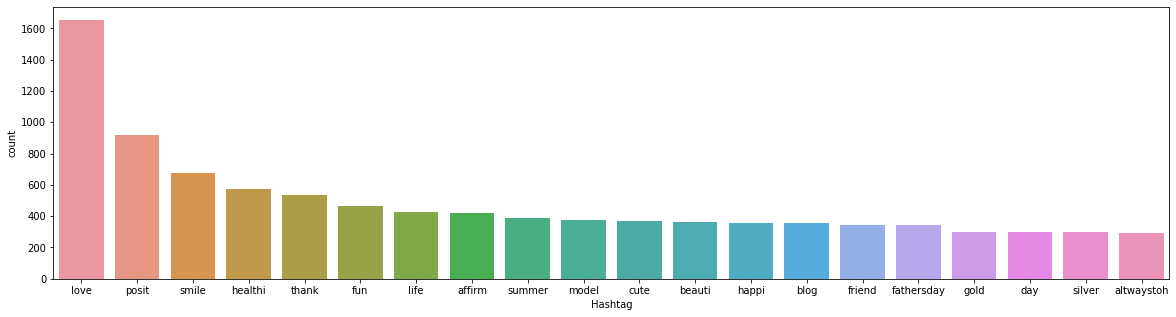

In [18]:
#Normal tweets
a=nltk.FreqDist(ht_regular)
d=pd.DataFrame({'Hashtag':list(a.keys()),'count':list(a.values())})
d=d.nlargest(columns='count',n=20)
plt.figure(figsize=(20,5))
ax=sns.barplot(data=d,x='Hashtag',y='count')
plt.show()

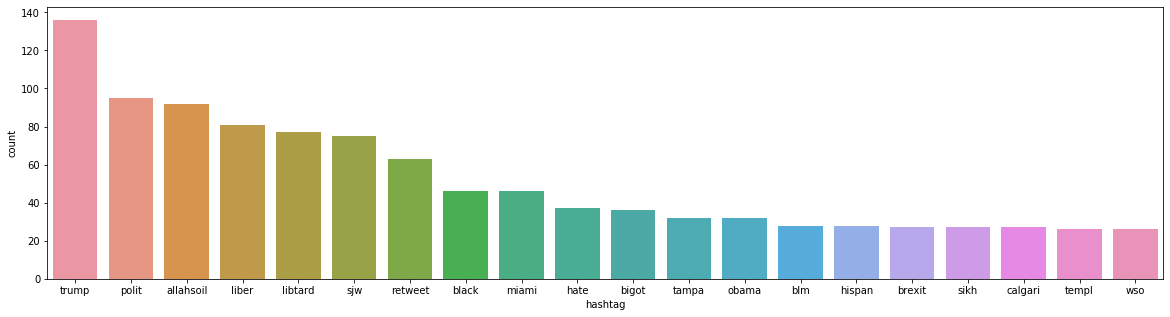

In [19]:
#Racist hashtag tweet
b=nltk.FreqDist(ht_neg)
e=pd.DataFrame({'hashtag':list(b.keys()),'count':list(b.values())})
e=e.nlargest(columns='count',n=20)
plt.figure(figsize=(20,5))
bx=sns.barplot(data=e,x='hashtag',y='count')
plt.show()

# Bags of Features

In [20]:
from sklearn.feature_extraction import text

bow_vectorizer = text.CountVectorizer(max_df=0.90, min_df=3, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combined['tidy_tweet']) 
bow.shape

(49159, 1000)

# TF-IDF

In [21]:
tfidf_vectorizer = text.TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combined['tidy_tweet']) 
tfidf.shape

(49159, 1000)

# Word2Vec

In [20]:
import gensim
tokenized_tweet=combined.tidy_tweet.apply(lambda x:x.split())
w2v=gensim.models.Word2Vec(tokenized_tweet,size=200,window=5,min_count=2,sg=1,hs=0,negative=10,workers=2,seed=34)
w2v.train(tokenized_tweet, total_examples= len(combined['tidy_tweet']), epochs=20)
w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.579729437828064),
 ('#avocado', 0.5637617111206055),
 ('#biall', 0.5625649690628052),
 ('noodl', 0.5588863492012024),
 ('fav', 0.5538758635520935),
 ('cookout', 0.5486493706703186),
 ('alfredo', 0.5323819518089294),
 ('#cellar', 0.5316358208656311),
 ('aladdin', 0.5290651321411133),
 ('#dnd', 0.528203010559082)]

In [21]:
w2v.wv.most_similar(positive="food")

[('void', 0.5119640231132507),
 ('#desktweet', 0.509418249130249),
 ('yaaaay', 0.5083827972412109),
 ('#nomnom', 0.4958188533782959),
 ('#doplant', 0.49543288350105286),
 ('alfredo', 0.49299922585487366),
 ('obes', 0.4914247989654541),
 ('#lovinreward', 0.49092841148376465),
 ('closur', 0.4904283881187439),
 ('#easesthepain', 0.4867702126502991)]

In [22]:
w2v.wv.most_similar(positive="happy")

[('sahri', 0.7790670990943909),
 ('savoryandsweetfood', 0.7544331550598145),
 ('#themonthofbless', 0.7471100091934204),
 ('kareem', 0.7254047989845276),
 ('ramdan', 0.7231810092926025),
 ('dice', 0.7125051617622375),
 ('mubarak', 0.7099618911743164),
 ('#maraton', 0.7090981602668762),
 ('mussulman', 0.7079228758811951),
 ('#nolimit', 0.7060422897338867)]

In [23]:
#Preparing vectors for tweet
def word_vector(token,size):
    vec=np.zeros(size).reshape(1,size)
    count=0
    for word in token:
        try:
            vec+=w2v[word].reshape(1,size)
            count+=1
        except KeyError:
            continue
    if count!=0:
        vec/=count
    return vec
            

In [24]:
#preparing w2v for features
wordvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape  
    

F:\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(49159, 200)

In [25]:
#we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

# Doc2Vec Word Embedding

In [28]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

F:\Anaconda3\envs\PythonGPU\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [29]:
#labelise or tag each tokenised tweet with unique IDs
def add_label(twt):
    output=[]
    for i,s in enumerate(twt):
        output.append(LabeledSentence(s,['tweet'+str(i)]))
    return output

In [30]:
labeled_tweets=add_label(tokenized_tweet)

F:\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


In [31]:
labeled_tweets[:5]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet4'])]

In [32]:
#Model
d2v=gensim.models.Doc2Vec(dm=1,dm_mean=1,size=200,windows=5,negative=7,min_count=5,workers=3,alpha=0.3,seed=23)
d2v.build_vocab([i for i in tqdm(labeled_tweets)])
d2v.train(labeled_tweets, total_examples= len(combined['tidy_tweet']), epochs=15)

F:\Anaconda3\envs\PythonGPU\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 49159/49159 [00:00<00:00, 1895195.46it/s]


In [33]:
#Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combined)):
    docvec_arrays[i,:] = d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

# MODEL-Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [36]:
#Bag of Words fearure
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_bow,train.label,test_size=0.3,random_state=42)
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.5291181364392679


F:\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
#TF-IDF features
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_tfidf,train.label,test_size=0.3,random_state=42)
lr.fit(x_train,y_train)
prediction=lr.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.5446507515473032


In [38]:
#Word2Vec feature
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_w2v,train.label,test_size=0.3,random_state=42)
lr.fit(x_train,y_train)
prediction=lr.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.6179941002949852


In [39]:
#Doc2Vec features
train_d2v=docvec_df.iloc[:31962,:]
test_d2v=docvec_df.iloc[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_d2v,train.label,test_size=0.3,random_state=42)
lr.fit(x_train,y_train)
prediction=lr.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

F:\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.14285714285714285


In [40]:
submission=pd.read_csv('G:\downloads\submission.csv')
test_pred = lr.predict_proba(test_w2v)
test_pred=test_pred[:,1]>=0.3
test_pred=test_pred.astype(np.int)
submission['label'] = test_pred
submission.to_csv('sub_lreg_w2v.csv', index=False)

# MODEL- Support Vector Sysytem

In [41]:
from sklearn import svm
svc=svm.SVC(kernel='linear',C=1,probability=True)

In [42]:
#Bags of Words feature
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_bow,train.label,test_size=0.3,random_state=42)
svc.fit(x_train,y_train)
prediction=svc.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.5088868101028999


In [43]:
#TF-IDF features
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_tfidf,train.label,test_size=0.3,random_state=42)
svc.fit(x_train,y_train)
prediction=svc.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.5109489051094891


In [44]:
#Word2Vec feature
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_w2v,train.label,test_size=0.3,random_state=42)
svc.fit(x_train,y_train)
prediction=svc.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.6265432098765433


In [45]:
#Doc2Vec features
train_d2v=docvec_df.iloc[:31962,:]
test_d2v=docvec_df.iloc[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_d2v,train.label,test_size=0.3,random_state=42)
svc.fit(x_train,y_train)
prediction=svc.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.00291970802919708


# MODEL-Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400,random_state=11)

In [47]:
#Bags of Words feature
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_bow,train.label,test_size=0.3,random_state=42)
rf.fit(x_train,y_train)
prediction=rf.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.5077720207253886


In [48]:
#TF-IDF features
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_tfidf,train.label,test_size=0.3,random_state=42)
rf.fit(x_train,y_train)
prediction=rf.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.5670962850644428


In [49]:
#Word2Vec feature
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_w2v,train.label,test_size=0.3,random_state=42)
rf.fit(x_train,y_train)
prediction=rf.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.6123128119800333


In [52]:
#Doc2Vec features
train_d2v=docvec_df.iloc[:31962,:]
test_d2v=docvec_df.iloc[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_d2v,train.label,test_size=0.3,random_state=42)
rf.fit(x_train,y_train)
prediction=rf.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.11316397228637413


# MODEL- Xgboost

In [31]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=6,n_estimators=1000)

In [36]:
#Bags of Words feature
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_bow,train.label,test_size=0.3,random_state=42)
xgb.fit(x_train,y_train)
prediction=xgb.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.5582922824302134


In [37]:
#TF-IDF features
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_tfidf,train.label,test_size=0.3,random_state=42)
xgb.fit(x_train,y_train)
prediction=xgb.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.560593569661995


In [38]:
#Word2Vec feature
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_w2v,train.label,test_size=0.3,random_state=42)
xgb.fit(x_train,y_train)
prediction=xgb.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.676320272572402


In [39]:
#Doc2Vec features
train_d2v=docvec_df.iloc[:31962,:]
test_d2v=docvec_df.iloc[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_d2v,train.label,test_size=0.3,random_state=42)
xgb.fit(x_train,y_train)
prediction=xgb.predict_proba(x_test)
prediction=prediction[:,1]>=0.3
prediction=prediction.astype(np.int)
print(f1_score(y_test,prediction))

0.10013531799729364


# FineTuning XGBoost + Word2Vec

Some key benefits of XGBoost are:

1.Regularization - helps in reducing overfitting

2.Parallel Processing - XGBoost implements parallel processing and is blazingly faster as compared to GBM.

3.Handling Missing Values - It has an in-built routine to handle missing values.

4.Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the boosting process

In [29]:
import xgboost as xgb
dtrain=xgb.DMatrix(x_train,label=y_train)
dvalid=xgb.DMatrix(x_test,label=y_test)
dtest=xgb.DMatrix(test_w2v)

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
x_train,x_test,y_train,y_test=train_test_split(train_w2v,train.label,test_size=0.3,random_state=42)

#Tuning max_depth and min_child
params={'max_depth':range(6,16),'min_child_weight':range(5,9),'eta':[.3, .2, .1, .05, .01, .005],'subsample':[i/10. for i in range(5,10)]
 ,'colsample':[i/10. for i in range(5,10)],'n_estimators':[500,1000,1500,2000]}
gs=GridSearchCV(xgb,params)
gs.fit(x_train,y_train)
gs.best_params

F:\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
